In [1]:
import keras
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load training and test images (x), and their respective classified labels (y).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
First 10 training labels as digits:
 [5 0 4 1 9 2 1 3 1 4]



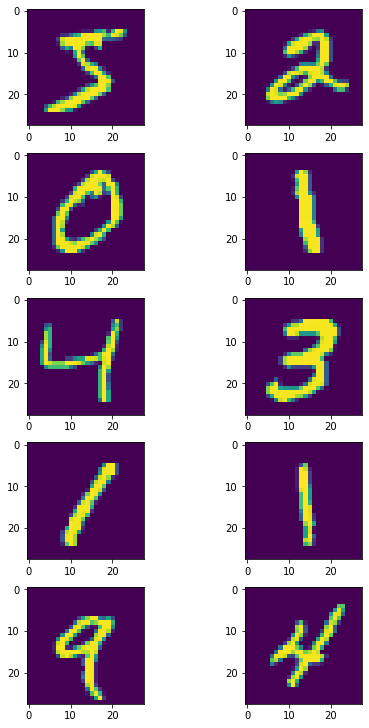

In [3]:
# Investigate the data

print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
print("First 10 training labels as digits:\n", y_train[:10])
print("")

# Plot the first 10 images
### STUDENT CODE HERE ###
fig1, ax1 = plt.subplots(5,2, figsize=(6, 10),constrained_layout=True)

img_nb = 0
for i in range(2):
    for j in range(5):
        ax1[j][i].imshow(x_train[img_nb])
        img_nb += 1

### END STUDENT CODE ###

In [4]:
# Pre-processing of data

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
print("reshaped training data format: ", x_train.shape) # -- 60000 images, now flat arrays of 28*28 long

# one-hot encode the labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 10 training lables as one-hot encoded vectors:\n", y_train[:10])

reshaped training data format:  (60000, 784)
First 10 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [9]:
# Build the network
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

model = Sequential()

# The input layer requires the special input_shape parameter, which should equal the shape of our training data.
# The output layer must be the same size as the (one-hot encoded) labels.
# Choose a non-linear activation function such as a sigmoid, or relu.
# For classification purposes, where the outputs are normalized 'probabilities' between the classes,
#  one typically uses the softmax activation function for the last layer.

### STUDENT CODE HERE ###
### --> add Dense (fully connected) layers to the model to connect input to output, using model.add().
###  Make sure that the dimensionality is correct: input should be # pixels large, 
###  output should be #classes large. Google is your friend.

model.add(keras.layers.Dense(1024, activation="sigmoid", input_shape=(28*28,)))
model.add(keras.layers.Dense(1024/2, activation="sigmoid"))
model.add(keras.layers.Dense(1024/3, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))


### END STUDENT CODE ###

# Print model summary. Shows network layout, and # free parameters (weights + biases) to adapt while learning.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 341)               174933    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                3420      
Total params: 1,506,993
Trainable params: 1,506,993
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the model

# A good loss function for probability classification that works well with softmax is the 'categorical crossentropy'.
#  It's a function of the difference between the predicted y (from running the image through the network),
#  and the actual label y that we get from the dataset. The larger the loss, the worst our network is performing.
# A good optimizer is the stochastic gradient descent (sgd) or adam.

### STUDENT CODE HERE ###
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
### END STUDENT CODE ###

Test loss: 2.59
Test accuracy: 0.0982
predicted: [4] ; real: [7]
predicted: [4] ; real: [2]
predicted: [4] ; real: [1]
predicted: [4] ; real: [0]
predicted: [4] ; real: [4]
predicted: [4] ; real: [1]
predicted: [4] ; real: [4]
predicted: [4] ; real: [9]
predicted: [4] ; real: [5]
predicted: [4] ; real: [9]


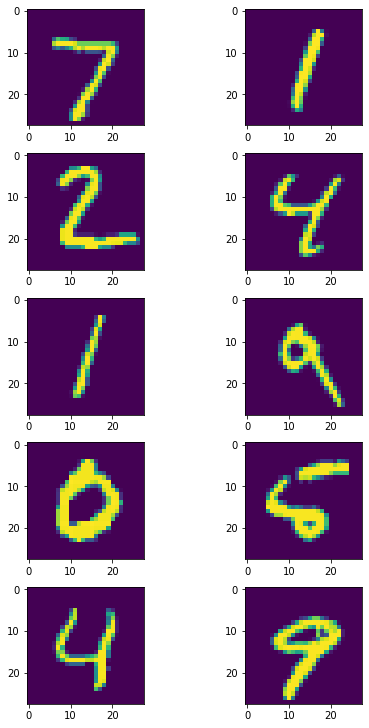

In [11]:
# Let's see how good the model 'predicts' some hand-written digits in our test dataset, without training.
# It's probably random: so for 10 digits, it should get an accuracy around 0.1 .

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

y_pred_test = model.predict(x_test)

### STUDENT CODE HERE ###
### --> call model.predict_proba() on the test images, and show the predictions of the
###  untrained model for the first 10 images. Also, plot those images, as you did above.
for pred, real in zip(y_pred_test[:10], y_test[:10]):
    print("predicted: " + str(np.where(pred == max(pred))[0]) + " ; real: " + str(np.where(real == max(real))[0]))
    
fig1, ax1 = plt.subplots(5,2, figsize=(6, 10),constrained_layout=True)

img_nb = 0
for i in range(2):
    for j in range(5):
        ax1[j][i].imshow(x_test[img_nb].reshape(28,28))
        img_nb += 1
### END STUDENT CODE ###

In [13]:
# Train the model.

# BATCH_SIZE defines how many images to process at once.
# EPOCHS defines how often to run over the total data (60000 images)
# (Note that a small part of the train data is internally split off for independent validation of the metrics)

### STUDENT CODE HERE ###
### --> Edit the parameters below to obtain a better accuracy in the training.

BATCH_SIZE = 128
EPOCHS = 20

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=.1)

Epoch 1/20
422/422 [==============================] - 10s 24ms/step - loss: 2.0105 - accuracy: 0.5963 - val_loss: 1.8099 - val_accuracy: 0.7205
Epoch 2/20
422/422 [==============================] - 11s 26ms/step - loss: 1.5919 - accuracy: 0.7157 - val_loss: 1.3205 - val_accuracy: 0.7587
Epoch 3/20
422/422 [==============================] - 12s 28ms/step - loss: 1.1547 - accuracy: 0.7856 - val_loss: 0.9310 - val_accuracy: 0.8478
Epoch 4/20
422/422 [==============================] - 11s 26ms/step - loss: 0.8562 - accuracy: 0.8299 - val_loss: 0.6953 - val_accuracy: 0.8838
Epoch 5/20
422/422 [==============================] - 12s 28ms/step - loss: 0.6731 - accuracy: 0.8585 - val_loss: 0.5481 - val_accuracy: 0.9025
Epoch 6/20
422/422 [==============================] - 11s 26ms/step - loss: 0.5558 - accuracy: 0.8763 - val_loss: 0.4548 - val_accuracy: 0.9088
Epoch 7/20
422/422 [==============================] - 11s 27ms/step - loss: 0.4777 - accuracy: 0.8882 - val_loss: 0.3927 - val_accuracy:

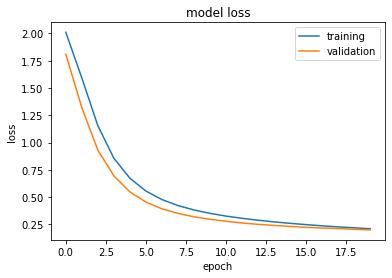

In [14]:
# Plot the progression of the training loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

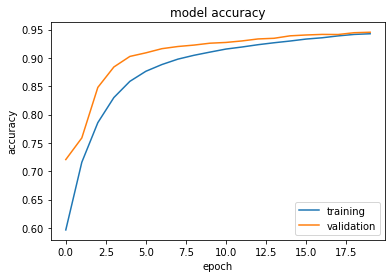

In [15]:
# Plot the progression of the training accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [16]:
# Evaluate model on test data - how often does the network predict the right label after training?

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make a confusion matrix to see which numbers are difficult to disentangle

y_pred_test = model.predict_proba(x_test) # obtain one-hot encoded predictions for the x_test images
y_test_index      = [ np.argmax(i) for i in y_test ] # actual number known labels
y_pred_test_index = [ np.argmax(i) for i in y_pred_test ] # actual number predictions
y_pred_test_proba = [ y_pred_test[i][ y_pred_test_index[i] ] for i in range(len(y_test_index)) ] # probabilities to be correct

from sklearn.metrics import confusion_matrix
### STUDENT CODE HERE ###
### --> Now predict again the labels for the test images, but after proper training.
###  Build a confusion matrix to show which labels we often confuse with what.
###  (Note that the y_test and y_pred are still one-hot encoded, so you need to get
###   the index of the maximum entry to find the corresponding predicted 'number'.
confusion_matrix(y_test_index, y_pred_test_index)
### END STUDENT CODE ###

Test loss: 0.235
Test accuracy: 0.934
Instructions for updating:
Please use `model.predict()` instead.


array([[ 960,    0,    3,    2,    0,    7,    5,    2,    1,    0],
       [   0, 1114,    3,    2,    1,    1,    3,    2,    9,    0],
       [  11,    2,  947,   10,   12,    1,   13,   12,   22,    2],
       [   3,    0,   20,  928,    0,   22,    1,   13,   18,    5],
       [   1,    1,    4,    0,  930,    0,   14,    1,    3,   28],
       [   9,    1,    4,   36,    4,  794,   13,    3,   22,    6],
       [  16,    3,    7,    0,    9,   10,  909,    1,    3,    0],
       [   4,    9,   23,    7,    8,    0,    0,  953,    1,   23],
       [   5,    6,    8,   19,   12,   21,   11,    9,  877,    6],
       [  12,    7,    1,    9,   29,    9,    1,   14,    3,  924]])

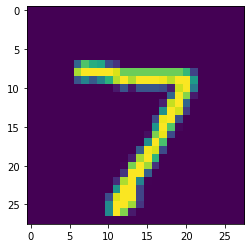

predicted: [7] with prob: 0.99445087 ; real: [7]


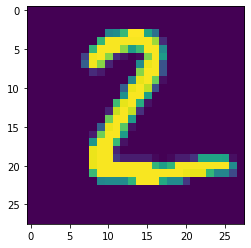

predicted: [2] with prob: 0.9248215 ; real: [2]


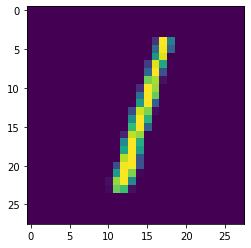

predicted: [1] with prob: 0.9948259 ; real: [1]


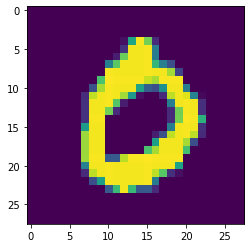

predicted: [0] with prob: 0.992912 ; real: [0]


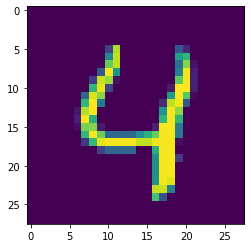

predicted: [4] with prob: 0.94896835 ; real: [4]


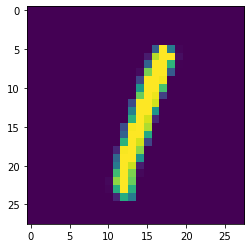

predicted: [1] with prob: 0.9942193 ; real: [1]


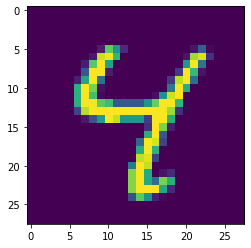

predicted: [4] with prob: 0.93379915 ; real: [4]


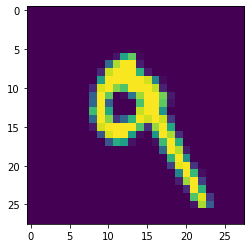

predicted: [9] with prob: 0.86685383 ; real: [9]


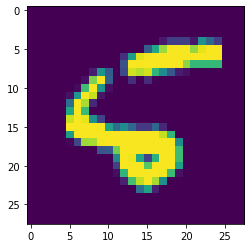

predicted: [6] with prob: 0.77469295 ; real: [5]


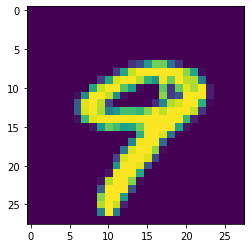

predicted: [9] with prob: 0.8761057 ; real: [9]


In [23]:
# Show some predicted labels and their probabilities to be correct

### STUDENT CODE HERE ###
### --> Now show some hand-written digit images from the test sample, 
###  their corresponding true label, their predicted label from your network,
###  and the probability associated with that prediction.

for pred, real, prob, img in zip(y_pred_test[:10], y_test[:10], y_pred_test_proba[:10], x_test[:10]):
    plt.imshow(img.reshape(28,28))
    plt.show()
    print("predicted: " + str(np.where(pred == max(pred))[0]) + " with prob: " + str(prob) + " ; real: " + str(np.where(real == max(real))[0]))


### END STUDENT CODE ###